In [96]:
train_file_path = "C:/project_ml/machine_learning_project/housing/artifact/data_ingestion/2023-07-13-16-56-31/ingested_data/train/housing.csv"

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv(train_file_path)


In [99]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [100]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [101]:
df.shape

(16512, 10)

In [102]:
# From schema file we can know the name of our target column . 
# the name of our target column is median_house_path

In [103]:
df["median_house_value"]

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [104]:
x,y = df.drop(columns=["median_house_value"],axis=1),df[["median_house_value"]]

In [105]:
x.shape

(16512, 9)

In [106]:
y.shape

(16512, 1)

In [107]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [108]:
# Here ocean proximity is categorical column .

In [109]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [110]:
# Inside the total_bedrooms column we will 158 Null value 

In [111]:
from sklearn.impute import SimpleImputer

In [112]:
# Now we can see that we are only Null value in total-bedrooms column but when we will get the dataset for prediction  then we can get Null value in any column .

In [113]:
# for exzample if i deployed my project and we see that we are getting Null value in any of the column then we should populate that Null value . 
# How to populate those Null values ?

In [114]:
# The SimpleImputer can impute, we are going to use strategy as median then i can apply this SimpleImputer on each and every column of numerical type . So, It can populate the Null value .

In [115]:
# As ocean proximity is a categorical column , so drop it.
numerical_column = x.drop(columns=['ocean_proximity'],axis=1)

In [116]:
numerical_column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [117]:
simple_imputer = SimpleImputer(strategy="median")

In [118]:
simple_imputer.fit_transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [119]:
# So, this will be our transformed dataset .

In [120]:
simple_imputer.transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [121]:
# So, we are getting numpy array .

In [122]:
df = simple_imputer.transform(numerical_column)

In [123]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [124]:
# From above code we will get the name of all the numerical feature that we have used .

In [125]:
simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [126]:
# This will give the median value for every column .

In [127]:
# So, if suppose in longitude column , i will get any missing value then i will replace that with -118.51  . Simillary for other columns also . These above values will be stored inside simple_imputer and whenever we will get any Null value then we can replace that value with the corresponding median value .

In [128]:
"""
  suppose we are getting any new dataframe (new_df) tommorow
  then we have to write this code :-
        simple_imputer.transform(new_df)

  to transform our new_df dataframe so that we could replace it's missing value with the respective median value .  Here we have used strategy = median


"""

"\n  suppose we are getting any new dataframe (new_df) tommorow\n  then we have to write this code :-\n        simple_imputer.transform(new_df)\n\n  to transform our new_df dataframe so that we could replace it's missing value with the respective median value .  Here we have used strategy = median\n\n\n"

In [129]:
# Calculating median value manually for longitude column in above dataframe
x.longitude.median()

-118.51

In [130]:
# We are getting same median value 

In [131]:
x.latitude.median()

34.26

In [132]:
# We can also use KNN imputer , it work like KNN algorithm . Based on nearest value it populate Null vlaues .

In [133]:
x.ocean_proximity

0            INLAND
1        NEAR OCEAN
2            INLAND
3        NEAR OCEAN
4         <1H OCEAN
            ...    
16507     <1H OCEAN
16508        INLAND
16509     <1H OCEAN
16510     <1H OCEAN
16511        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [134]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [135]:
# If there will be missing value then we will replace it with <1H OCEAN in ocean_proximity

In [136]:
# we can use strategy here as most frequent .
simple_imputer = SimpleImputer(strategy = "most_frequent")

In [137]:
# Every transform function  that we will import will have components like fit , transform and fit_transform.
# fit is like training our dataset . fit basically help us to analyse data and come to some conclusion . we have calculated median value of all the columns with the help of fit and along with we can get the name of all the columns present in a dataset .we are applying fit only on training dataset . Then  we are going to pickle it , then we will use that pickle object to transform our testing dataset .

In [138]:
 # for testing dataset we are not goint to transform manually . transform is mainly used in the testing dataset , mainly when we will go for the prediction .
 # At that time i can use transform . But during the first time , i have to use fit_transform so that it can learns from data .

In [139]:
# We want to create our own customer transformer then it should also have these three components .
 # It is not possible to use simple imputer or any other transformer everywhere , sometime we have create our own custom transformer and use it according to our dataset .

In [140]:
from sklearn.base import BaseEstimator,TransformerMixin

If we want to use any kind of estimator then we can use BaseEstimator .

In [141]:
# custom transformer
class FeatureGenerator(BaseEstimator,TransformerMixin):
    
    def __init__(self,strategy="median"):
        self.strategy = strategy

    def fit(self,x):
        self.features_ = x.columns
        self.statistic_= []
        for column in x.columns:
            self.statistic_.append(x[column].median())
        return self

    def transform(self,x):
        for idx,column in enumerate(x.columns):
            x[column].fillna(self.statistic_[idx])
        return x

    # def fit_transform(self,x):
    #     self.fit(x)
    #     return self.transform(x)

    # If we inherit TransformerMixin ,then we don't need to use fit_transfom function .


In [142]:
# So, this way we have to create our custom transformer . 
# In fit we calculate the value that will be utilized in the transformation .

The fillna() method replaces the NULL values with a specified value. The fillna() method returns a new DataFrame object unless the inplace parameter is set to True , in that case the fillna() method does the replacing in the original DataFrame instead.

In [143]:
response = FeatureGenerator().fit(numerical_column)

In [145]:
response.statistic_

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

In [146]:
for idx,column in enumerate(x.columns):
    print(idx,column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [147]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


Each of the above row represent data of related to house price of every district . We have to predict house price . 

In [148]:
"""
    add_bedrooms_per_room = total_bedrooms / toal_rooms}
"""

'\n    add_bedrooms_per_room = total_bedrooms / toal_rooms}\n'

In [149]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [173]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

import numpy as np
class FeatureGenerator(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True,total_rooms_ix = 3, population_ix = 5,households_ix = 6, total_bedrooms_ix = 4, columns = None):
        """
        FeatureGenerator Initialization
        add_bedroom_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of household columns
        total_bedrooms_ix: int index number of bedroom columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)
            
            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e 

    def fit(self, X, y=None):
        return self
    
    def transform(self,X,y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e

        

In [174]:
""" We do standard scaling to make data in same scale  ."""

' We do standard scaling to make data in same scale  .'

In [175]:
import numpy as np

In [176]:
arr1 = np.arange(10)
arr2 = np.arange(10)

In [177]:
np.c_[arr1,arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [178]:
"""
   np.c_


   we use np.c_ for the concatenation .
"""

'\n   np.c_\n\n\n   we use np.c_ for the concatenation .\n'

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [180]:
# We can create seperate pipeline for numerical column and we can create seperate pipeline for categorical column . At final stage we can combine both the transformation for this we ColumnTransformer . The operation that we will apply in numerical column is different form the operation that we will apply in categorical column . At final stage we have to combine everything so that'sway we use ColumnTransformer .

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
# first prepare numerical pipeline.
# In this list we have to specify all the transformation name  in sequence . Basically it will be tuple .
num_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy="median")),
    ('feature_genrator' , FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [183]:
# From above step we can see that all the feature engineering step we can combine in single pipeline .

In [184]:
from sklearn.preprocessing import OneHotEncoder

In [185]:
# categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy="most_frequent")),
    ('oneHotEncoder' , OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

In [186]:
df = pd.read_csv(train_file_path)

In [187]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [188]:
num_column_name = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

cat_column_name = ['ocean_proximity']

In [189]:
# Next create preprocessing object

preprocessing = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)
])

In [190]:
# From above code we can tell that we have created our pipeline .

In [217]:
train_df = preprocessing.fit_transform(df)

In [192]:
# So, from above code we got our transformed dataset .

In [193]:
# Suppose if we now get a new dataset then we have transform it like below mentioned code :-

In [254]:
test_file_path="C:/project_ml/machine_learning_project/housing/artifact/data_ingestion/2023-07-13-16-56-31/ingested_data/test/housing.csv"
test_df = pd.read_csv(test_file_path)

In [255]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4123,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
4124,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
4125,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
4126,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [256]:
test_arr = preprocessing.transform(test_df)

In [257]:
preprocessing.fit_transform(test_df)

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [197]:
# Now in one line , i can do featrue engineering on new dataset .

In [199]:
# If i have to save this new dataset then :-
import dill

In [203]:
with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing,prep_file)

In [204]:
# Here preprocessing is object and prep_file is preprocessing file . preprocessing.pkl is a pickle file . we will save the object inside the file . The term name is serialization .

In [205]:
# If we want to load object
with open('preprocessing.pkl',"rb") as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

In [207]:
# We can load our object like this :-
preprocessing_loaded_obj

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_genrator',
                                                  FeatureGenerator()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoder',
                                  

In [258]:
# Now if we have to transform our dataset .
preprocessing_loaded_obj.transform(test_df)

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [212]:
# like this we can save our feature engineering step and we can use our feature engineering step to find prediction pipeline . In prediction pipeline we don't have to write any code for transformation .

In [213]:
# I will pass my file path , i will load my object then i will transform my dataset .Then i can pass this transform dataset in my model to get the prediction .

In [214]:
# Now we have our transformed dataset . so , we need to train our model .

In [226]:
x=train_df

In [227]:
x

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [220]:
train_df.shape

(16512, 16)

In [221]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [222]:
df.shape

(16512, 10)

In [228]:
# median_house_value is our target column
y = np.array(df.median_house_value)

In [229]:
y

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [215]:
# for example if i want to test linear regression .
from sklearn.linear_model import LinearRegression

In [230]:
lr = LinearRegression()

In [232]:
# train our model
lr.fit(x,y)

LinearRegression()

In [233]:
lr.fit_intercept

True

In [238]:
# To check coefficient for every column .
lr.coef_

array([-5.56496364e+04, -5.67116017e+04,  1.37347207e+04, -1.94305978e+03,
        7.34323130e+03, -4.57092793e+04,  4.54532619e+04,  7.47141541e+04,
        6.60458451e+03,  1.04305405e+03,  9.24831599e+03,  8.65163085e+12,
        8.11998124e+12,  1.91774951e+11,  5.49259813e+12,  5.83419330e+12])

In [235]:
lr.intercept_

-17426212993337.445

In [239]:
# To get our target feacture we can make prediction 
lr.predict(x)

array([ 85659.48046875, 305494.18359375, 152058.04296875, ...,
       220684.71484375, 238865.1171875 ,  98199.37890625])

In [240]:
y_hat = lr.predict(x)

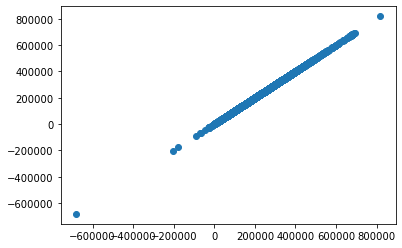

In [243]:
# we want to see how y is different form y_hat value :- 
# to use scatter plot we have used "o"  .
import matplotlib.pyplot as plt
plt.plot(y,y_hat,"o")

In [244]:
# if we want to check from sklearn.metrics
from sklearn.metrics import r2_score

In [245]:
r2_score(y,y_hat)

1.0

In [246]:
# 100 % accuracy we are getting .

In [248]:
# If on testing dataset we wanted to check the accuracy then :-
yhat_test = lr.predict(test_arr)

In [249]:
yhat_test

array([-3.69677781e+10, -3.69679091e+10, -3.69679596e+10, ...,
       -3.69678946e+10, -3.69679362e+10, -3.69679632e+10])

In [259]:
y_test = np.array(test_df.median_house_value)

In [260]:
r2_score(y_test,yhat_test)

-7052998334940.763